In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
df = pd.read_csv('./model_data/model_data_interpolated.csv')
lstm_loss = pd.read_csv('./model_data/lstm_loss.csv')
gru_loss = pd.read_csv('./model_data/gru_loss.csv')
lstm_prediction = pd.read_csv('./model_data/lstm_prediction.csv')
gru_prediction = pd.read_csv('./model_data/gru_prediction.csv')

# Loss Function Plot

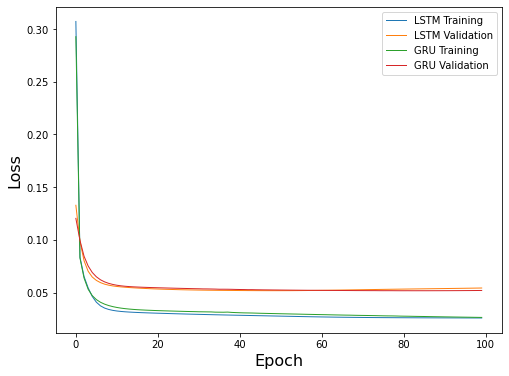

In [3]:
# plot history
plt.figure(figsize=(8,6))
plt.plot(lstm_loss['lstm_loss'], linewidth=1, label='LSTM Training')
plt.plot(lstm_loss['lstm_val_loss'], linewidth=1, label='LSTM Validation')
plt.plot(gru_loss['gru_loss'], linewidth=1, label='GRU Training')
plt.plot(gru_loss['gru_val_loss'], linewidth=1, label='GRU Validation')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend()
#plt.savefig('../images/evaluation.png')

# Predictions vs Obsersations Plot

In [4]:
# extract testing output data from model data
inv_y = df['Niamey'].values
inv_y = inv_y[9131+1:]
inv_y = inv_y.reshape(inv_y.shape[0], 1)

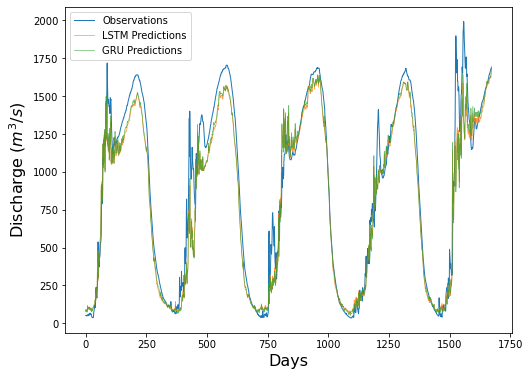

In [5]:
# plot predicitons
plt.figure(figsize=(8,6))
plt.plot(inv_y, linewidth=1, label='Observations')
plt.plot(lstm_prediction['lstm_prediction'], linewidth=0.7, alpha=0.8, label='LSTM Predictions')
plt.plot(gru_prediction['gru_prediction'], linewidth=0.7, alpha=0.7, label='GRU Predictions')
#plt.title('Predicted vs Observed')
plt.xlabel('Days', fontsize=16)
plt.ylabel('Discharge ($m^3/s$)', fontsize=16)
plt.legend()
#plt.savefig('../images/prediction_vs_observation.png')

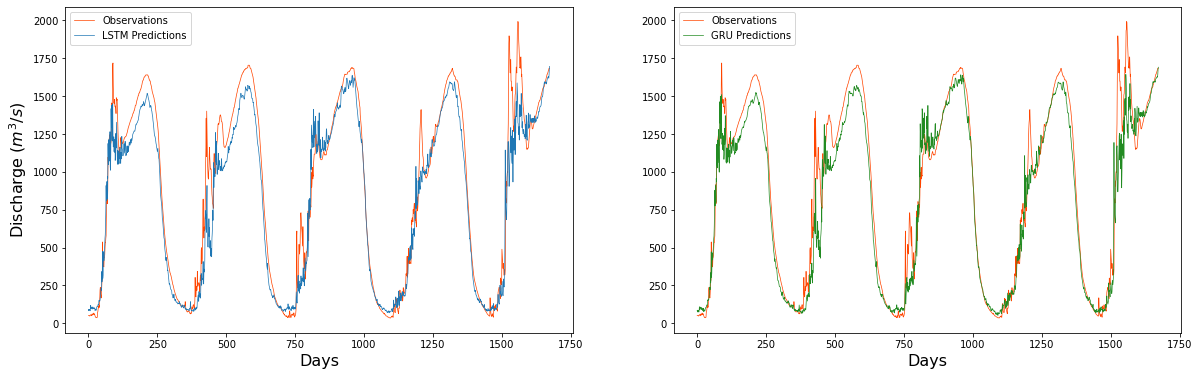

In [6]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(inv_y, linewidth=0.7, color='orangered', label='Observations')
plt.plot(lstm_prediction['lstm_prediction'], color='tab:blue', linewidth=0.7, label='LSTM Predictions')
plt.xlabel('Days', fontsize=16)
plt.ylabel('Discharge ($m^3/s$)', fontsize=16)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(inv_y, linewidth=0.7, color='orangered', label='Observations')
plt.plot(gru_prediction['gru_prediction'], linewidth=0.7, color='forestgreen', label='GRU Predictions')
plt.xlabel('Days', fontsize=16)
plt.legend()

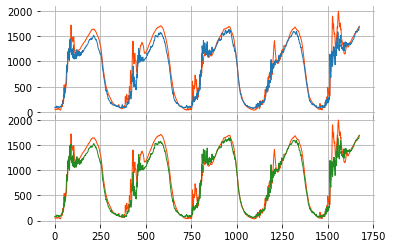

In [7]:
fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True, subplot_kw=dict(frameon=False)) 

plt.subplots_adjust(hspace=.0)
ax1.grid()
ax2.grid()

ax1.plot(inv_y, linewidth=1, color='orangered', label='Observations')
ax1.plot(lstm_prediction['lstm_prediction'], color='tab:blue', linewidth=1, label='LSTM Predictions')
ax2.plot(inv_y, linewidth=1, color='orangered', label='Observations')
ax2.plot(gru_prediction['gru_prediction'], linewidth=1, color='forestgreen', label='GRU Predictions')

# Other Plots

## Daily

In [8]:
y_pr = df['pr']
y_tmax = df['tmax']
y_tmin = df['tmin']
y_ansongo = df['Ansongo']
y_kandadji = df['Kandadji']
y_niamey = df['Niamey']

In [9]:
date_time = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head(2)

,Date,pr,tmax,tmin,Ansongo,Kandadji,Niamey
0,1981-06-01,0.525346,38.824417,27.352827,14.0,20.4,5.03
1,1981-06-02,0.732719,39.789036,27.593908,13.0,17.0,4.61


### Precipitation

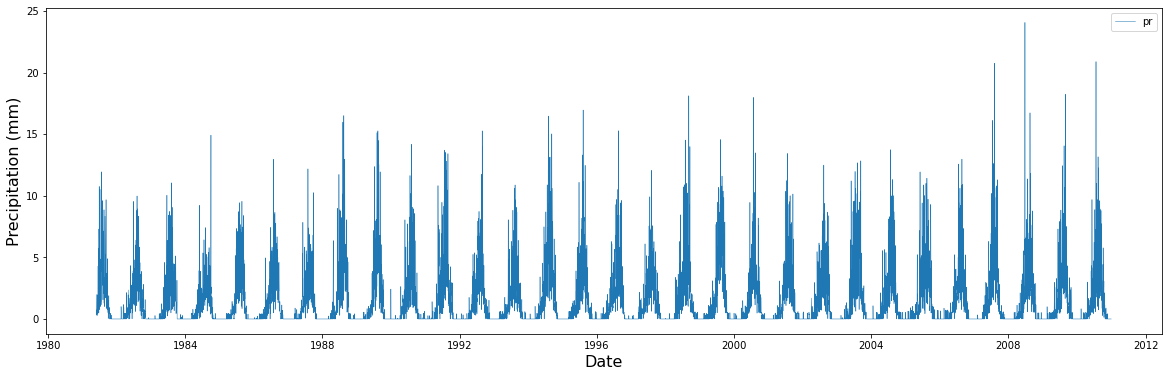

In [10]:
plt.figure(figsize=(20,6))
plt.plot(date_time, y_pr, color='tab:blue', linewidth=0.5, label='pr')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Precipitation (mm)', fontsize=16)
plt.legend()
#plt.savefig('../images/pr_day_1981_2010.png')

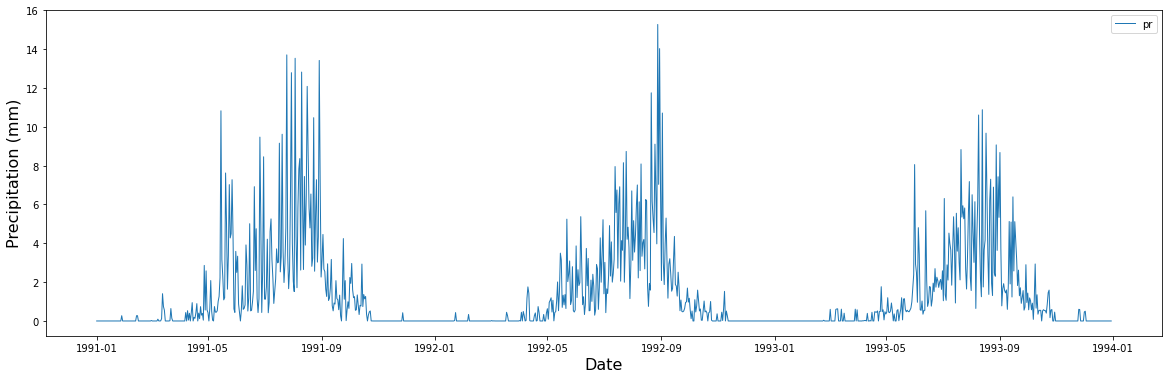

In [11]:
i = 3501
j = 4596
plt.figure(figsize=(20,6))
plt.plot(date_time[i:j], y_pr[i:j], color='tab:blue', linewidth=1, label='pr')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Precipitation (mm)', fontsize=16)
plt.legend()
#plt.savefig('../images/pr_day_1991_1993.png')

## Temperature

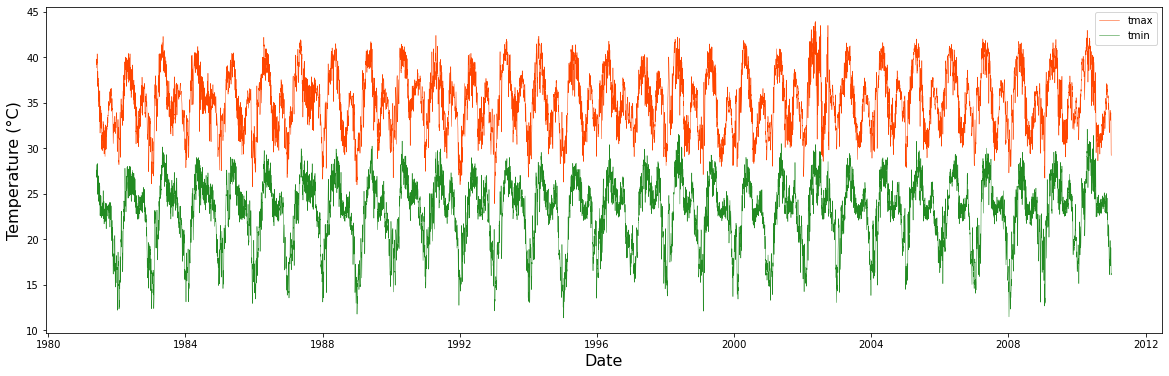

In [12]:
plt.figure(figsize=(20,6))
plt.plot(date_time, y_tmax, color='orangered', linewidth=0.5, label='tmax')
plt.plot(date_time, y_tmin, color='forestgreen', linewidth=0.5, label='tmin')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=16)
plt.legend()
#plt.savefig('../images/temp_day_1981_2010.png')

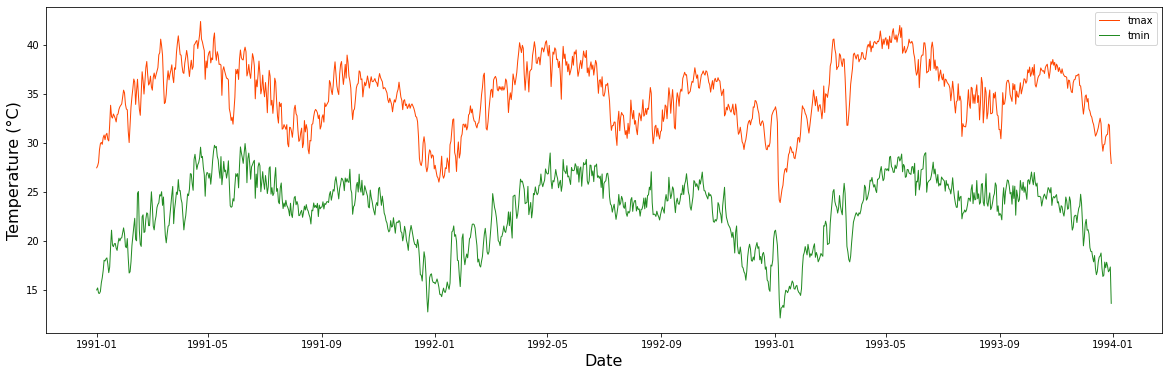

In [13]:
i = 3501
j = 4596
plt.figure(figsize=(20,6))
plt.plot(date_time[i:j], y_tmax[i:j], color='orangered', linewidth=1, label='tmax')
plt.plot(date_time[i:j], y_tmin[i:j], color='forestgreen', linewidth=1, label='tmin')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=16)
plt.legend()
#plt.savefig('../images/temp_day_1991_1993.png')

## Discharge

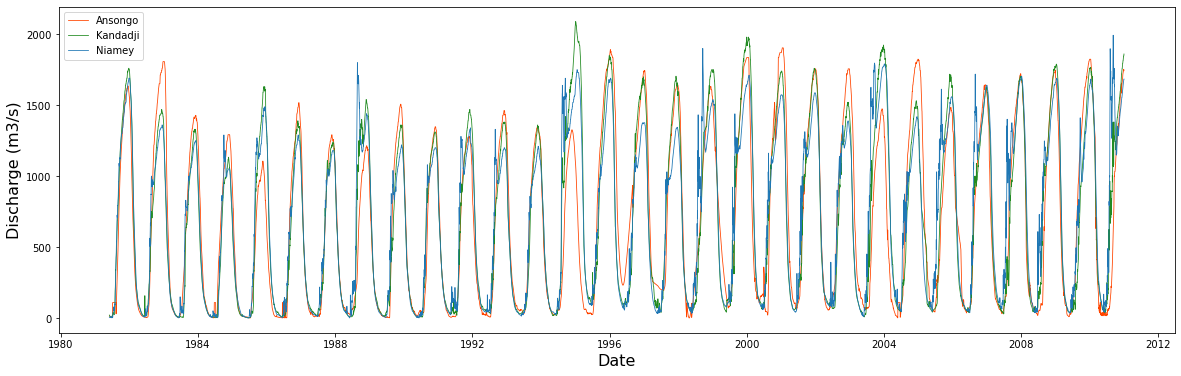

In [14]:
plt.figure(figsize=(20,6))
plt.plot(date_time, y_ansongo, color='orangered', linewidth=0.8, label='Ansongo')
plt.plot(date_time, y_kandadji, color='forestgreen', linewidth=0.8, label='Kandadji')
plt.plot(date_time, y_niamey, color='tab:blue', linewidth=0.8, label='Niamey')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge (m3/s)', fontsize=16)
plt.legend()
#plt.savefig('../images/q_day_1981_2010.png')

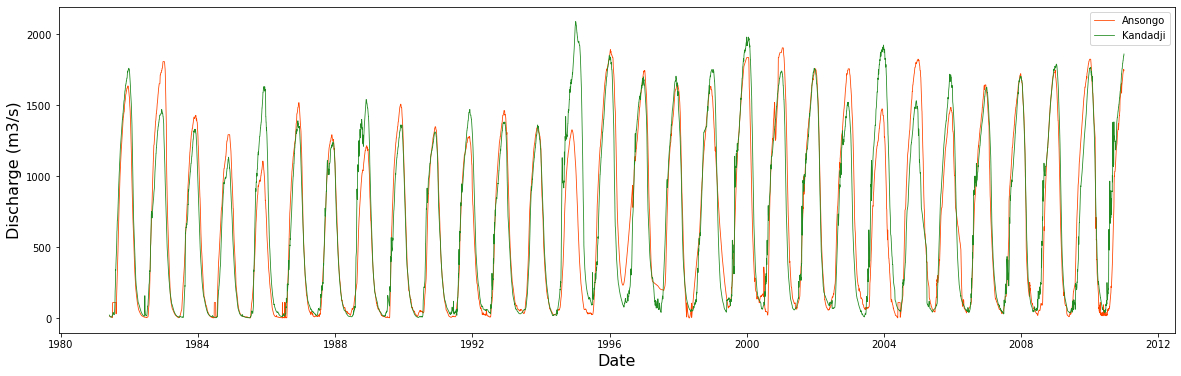

In [15]:
plt.figure(figsize=(20,6))
plt.plot(date_time, y_ansongo, color='orangered', linewidth=0.8, label='Ansongo')
plt.plot(date_time, y_kandadji, color='forestgreen', linewidth=0.8, label='Kandadji')
#plt.plot(date_time, y_niamey, color='tab:blue', linewidth=0.8, label='Niamey')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge (m3/s)', fontsize=16)
plt.legend()
#plt.savefig('../images/q_day_1981_2010_a_k.png')

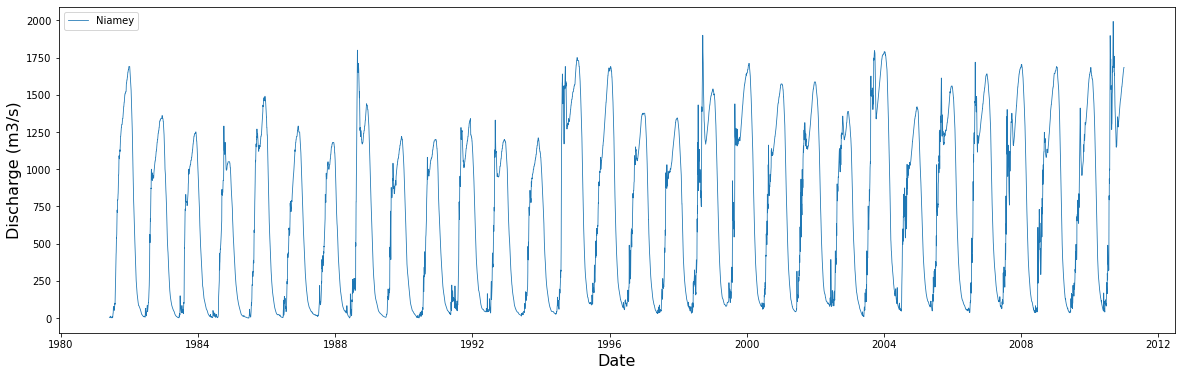

In [16]:
plt.figure(figsize=(20,6))
#plt.plot(date_time, y_ansongo, color='orangered', linewidth=0.8, label='Ansongo')
#plt.plot(date_time, y_kandadji, color='forestgreen', linewidth=0.8, label='Kandadji')
plt.plot(date_time, y_niamey, color='tab:blue', linewidth=0.8, label='Niamey')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge (m3/s)', fontsize=16)
plt.legend()
#plt.savefig('../images/q_day_1981_2010_n.png')

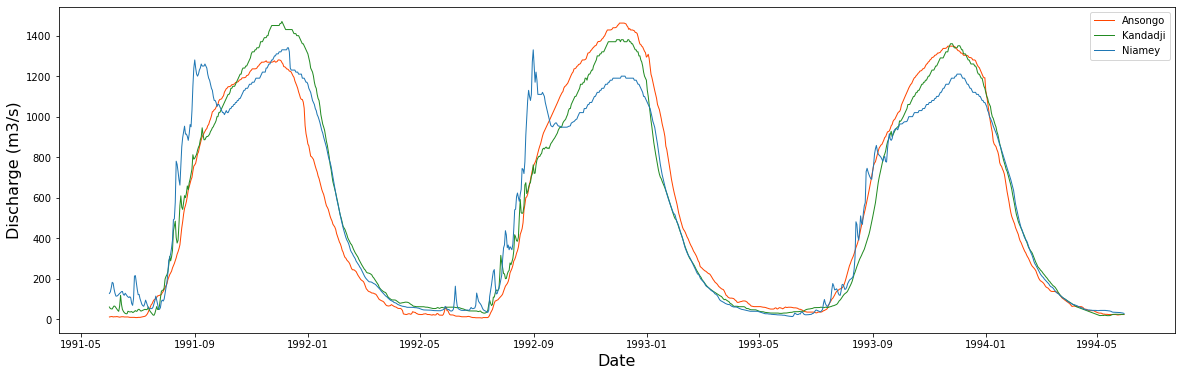

In [17]:
i = 3652
j = 4747
plt.figure(figsize=(20,6))
plt.plot(date_time[i:j], y_ansongo[i:j], color='orangered', linewidth=1, label='Ansongo')
plt.plot(date_time[i:j], y_kandadji[i:j], color='forestgreen', linewidth=1, label='Kandadji')
plt.plot(date_time[i:j], y_niamey[i:j], color='tab:blue', linewidth=1, label='Niamey')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge (m3/s)', fontsize=16)
plt.legend()
#plt.savefig('../images/q_day_1991_1993.png')

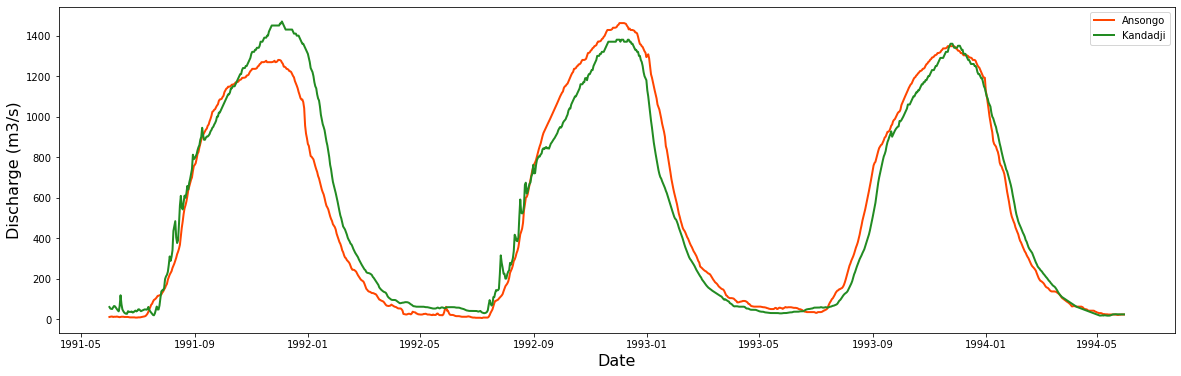

In [18]:
i = 3652
j = 4747
plt.figure(figsize=(20,6))
plt.plot(date_time[i:j], y_ansongo[i:j], color='orangered', linewidth=2, label='Ansongo')
plt.plot(date_time[i:j], y_kandadji[i:j], color='forestgreen', linewidth=2, label='Kandadji')
#plt.plot(date_time[i:j], y_niamey[i:j], color='tab:blue', linewidth=2, label='Niamey')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge (m3/s)', fontsize=16)
plt.legend()
plt.savefig('../images/q_day_1991_1993_a_k.png')

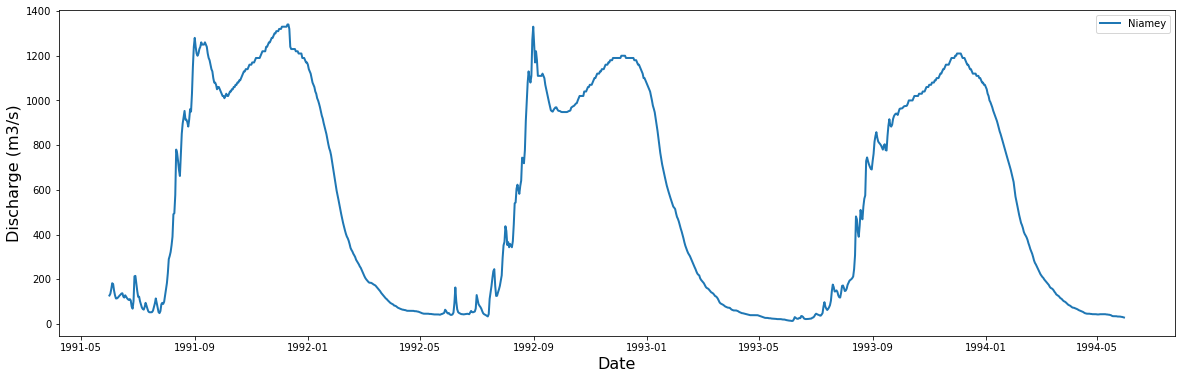

In [19]:
i = 3652
j = 4747
plt.figure(figsize=(20,6))
#plt.plot(date_time[i:j], y_ansongo[i:j], color='orangered', linewidth=2, label='Ansongo')
#plt.plot(date_time[i:j], y_kandadji[i:j], color='forestgreen', linewidth=2, label='Kandadji')
plt.plot(date_time[i:j], y_niamey[i:j], color='tab:blue', linewidth=2, label='Niamey')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge (m3/s)', fontsize=16)
plt.legend()
plt.savefig('../images/q_day_1991_1993_n.png')

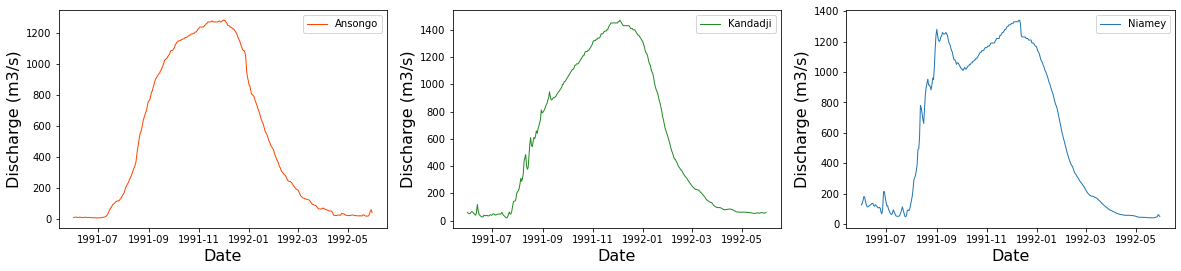

In [20]:
i = 3652
j = 4017

plt.figure(figsize=(20,4))
plt.subplot(1, 3, 1)
plt.plot(date_time[i:j], y_ansongo[i:j], color='orangered', linewidth=1, label='Ansongo')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge (m3/s)', fontsize=16)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(date_time[i:j], y_kandadji[i:j], color='forestgreen', linewidth=1, label='Kandadji')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge (m3/s)', fontsize=16)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(date_time[i:j], y_niamey[i:j], color='tab:blue', linewidth=1, label='Niamey')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge (m3/s)', fontsize=16)
plt.legend()
#plt.savefig('../images/q_day_1991_1993_sub.png')

## Monthly Mean

In [21]:
# load data
df = pd.read_csv('./model_data/model_data_interpolated.csv')

In [22]:
# set Date as index
df.Date = pd.to_datetime(df.Date)
df_date = df.set_index('Date', inplace=False)

In [23]:
# get monthly mean
df_month = df_date.resample('M').mean()

In [24]:
# group months
df_monthly_mean = df_month.groupby(df_month.index.month).mean()

# reset index
df_monthly_mean = df_monthly_mean.reset_index()

In [25]:
# add months to columns
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
df_monthly_mean['months'] = months

In [26]:
# start from june
df_monthly_mean_resample = df_monthly_mean.reindex([5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4])
df_monthly_mean_resample

,Date,pr,tmax,tmin,Ansongo,Kandadji,Niamey,months
5,6,2.230840,37.256642,26.557741,62.136526,50.185773,71.989838,June
6,7,3.922526,33.963556,24.597075,124.797979,126.407211,226.284194,July
7,8,4.984436,32.058701,23.504923,439.297481,499.036916,748.940194,Aug
8,9,2.934859,33.497178,24.010573,944.846667,946.529636,1104.731111,Sept
9,10,0.709137,35.909361,24.263688,1249.303226,1228.811243,1144.317204,Oct
10,11,0.048971,35.078977,21.565625,1443.437778,1449.702693,1296.574444,Nov
11,12,0.012794,32.130260,18.315304,1510.649462,1537.919334,1405.497849,Dec
0,1,0.009145,31.221933,17.077446,1224.733037,1251.711124,1202.400445,Jan
1,2,0.022031,34.169786,19.330566,716.537206,742.265766,749.148548,Feb
2,3,0.093063,37.393971,22.638928,296.995137,309.707342,308.727364,Mar


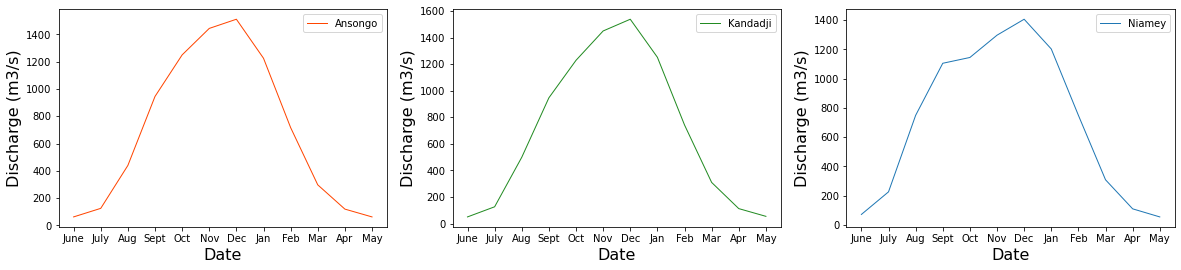

In [27]:
plt.figure(figsize=(20,4))
plt.subplot(1, 3, 1)
plt.plot(df_monthly_mean_resample['months'], df_monthly_mean_resample['Ansongo'], color='orangered', linewidth=1, label='Ansongo')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge (m3/s)', fontsize=16)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(df_monthly_mean_resample['months'], df_monthly_mean_resample['Kandadji'], color='forestgreen', linewidth=1, label='Kandadji')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge (m3/s)', fontsize=16)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(df_monthly_mean_resample['months'], df_monthly_mean_resample['Niamey'], linewidth=1, label='Niamey')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge (m3/s)', fontsize=16)
plt.legend()
plt.savefig('../images/q_bymonth.png')

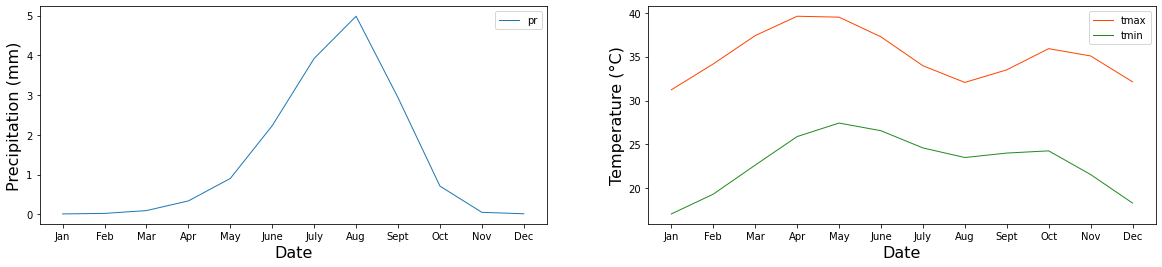

In [28]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
plt.plot(df_monthly_mean['months'], df_monthly_mean['pr'], linewidth=1, label='pr')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Precipitation (mm)', fontsize=16)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_monthly_mean['months'], df_monthly_mean['tmax'], color='orangered', linewidth=1, label='tmax')
plt.plot(df_monthly_mean['months'], df_monthly_mean['tmin'], color='forestgreen', linewidth=1, label='tmin')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=16)
plt.legend()
#plt.savefig('../images/pr_temp_bymonth.png')

In [29]:
df_monthly_mean_resample

,Date,pr,tmax,tmin,Ansongo,Kandadji,Niamey,months
5,6,2.230840,37.256642,26.557741,62.136526,50.185773,71.989838,June
6,7,3.922526,33.963556,24.597075,124.797979,126.407211,226.284194,July
7,8,4.984436,32.058701,23.504923,439.297481,499.036916,748.940194,Aug
8,9,2.934859,33.497178,24.010573,944.846667,946.529636,1104.731111,Sept
9,10,0.709137,35.909361,24.263688,1249.303226,1228.811243,1144.317204,Oct
10,11,0.048971,35.078977,21.565625,1443.437778,1449.702693,1296.574444,Nov
11,12,0.012794,32.130260,18.315304,1510.649462,1537.919334,1405.497849,Dec
0,1,0.009145,31.221933,17.077446,1224.733037,1251.711124,1202.400445,Jan
1,2,0.022031,34.169786,19.330566,716.537206,742.265766,749.148548,Feb
2,3,0.093063,37.393971,22.638928,296.995137,309.707342,308.727364,Mar


In [30]:
np.mean(df_monthly_mean_resample['tmax'] - df_monthly_mean_resample['tmin'])

12.21644340583193

## Monthly

In [31]:
# load data
df = pd.read_csv('./model_data/model_data_interpolated.csv')
df.head(2)

,Date,pr,tmax,tmin,Ansongo,Kandadji,Niamey
0,1981-06-01,0.525346,38.824417,27.352827,14.0,20.4,5.03
1,1981-06-02,0.732719,39.789036,27.593908,13.0,17.0,4.61


In [32]:
# set Date as index
df.Date = pd.to_datetime(df.Date)
df_date = df.set_index('Date', inplace=False)

# get monthly date
df_monthly = df_date.resample('MS').mean()
df_monthly = df_monthly.reset_index()
df_monthly

,Date,pr,tmax,tmin,Ansongo,Kandadji,Niamey
0,1981-06-01,2.525806,37.401221,26.206514,9.500000,9.363000,4.579200
1,1981-07-01,4.425152,32.576556,23.604604,98.429246,38.325806,50.544194
2,1981-08-01,4.179575,31.011814,22.987800,200.517357,500.870968,525.290323
3,1981-09-01,2.873886,32.002750,22.996468,854.466667,1038.666667,1069.200000
4,1981-10-01,0.452505,35.097172,23.032020,1300.483871,1380.322581,1324.193548
...,...,...,...,...,...,...,...
350,2010-08-01,5.391556,30.845278,23.554611,220.096774,820.475482,1523.741935
351,2010-09-01,3.630108,31.372740,23.732149,815.666667,1204.103337,1677.233333
352,2010-10-01,1.398246,33.002882,23.996769,1227.000000,1335.605969,1253.838710
353,2010-11-01,0.072965,35.764705,23.067341,1471.900000,1559.815666,1403.733333


In [33]:
y_pr_m = df_monthly['pr']
y_tmax_m = df_monthly['tmax']
y_tmin_m = df_monthly['tmin']
y_ansongo_m = df_monthly['Ansongo']
y_kandadji_m = df_monthly['Kandadji']
y_niamey_m = df_monthly['Niamey']

In [34]:
date_time_m = pd.to_datetime(df_monthly['Date'], format='%Y-%m-%d')

### Precipitation

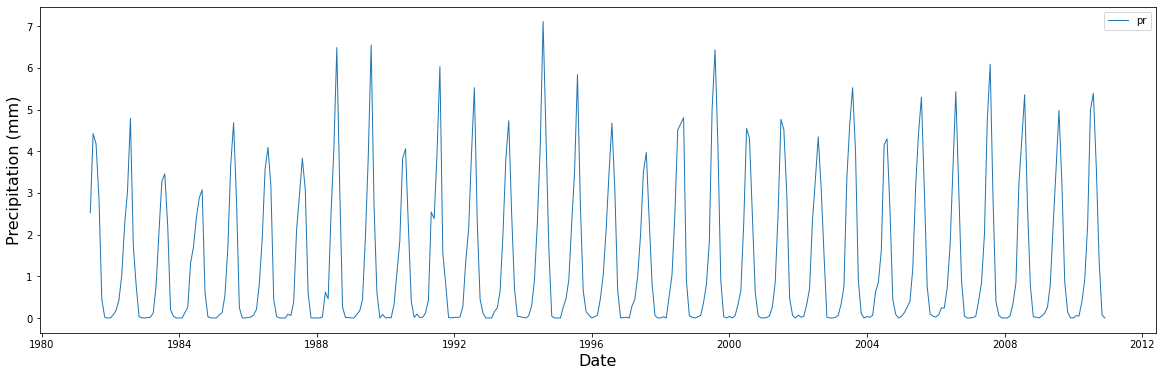

In [35]:
plt.figure(figsize=(20,6))
plt.plot(date_time_m, y_pr_m, color='tab:blue', linewidth=1, label='pr')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Precipitation (mm)', fontsize=16)
plt.legend()
#plt.savefig('../images/pr_month_1981_2010.png')

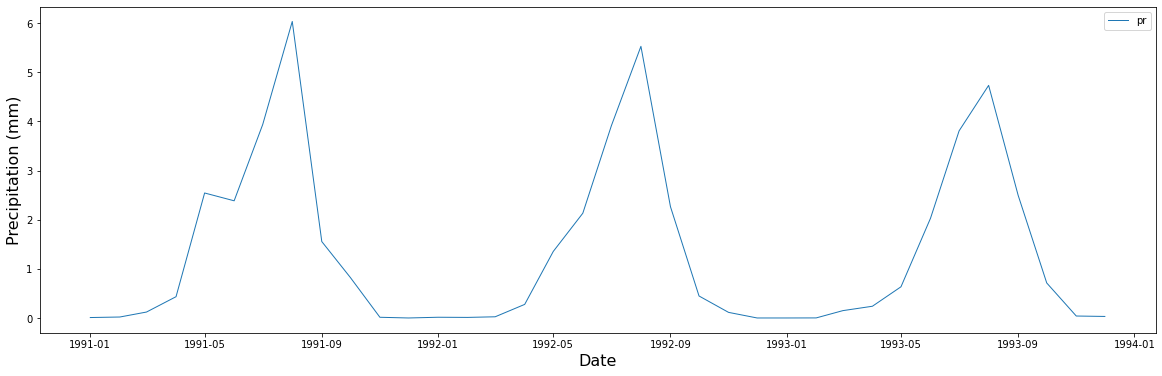

In [36]:
i = 115
j = 151
plt.figure(figsize=(20,6))
plt.plot(date_time_m[i:j], y_pr_m[i:j], color='tab:blue', linewidth=1, label='pr')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Precipitation (mm)', fontsize=16)
plt.legend()
#plt.savefig('../images/pr_month_1991_1993.png')

## Temperature

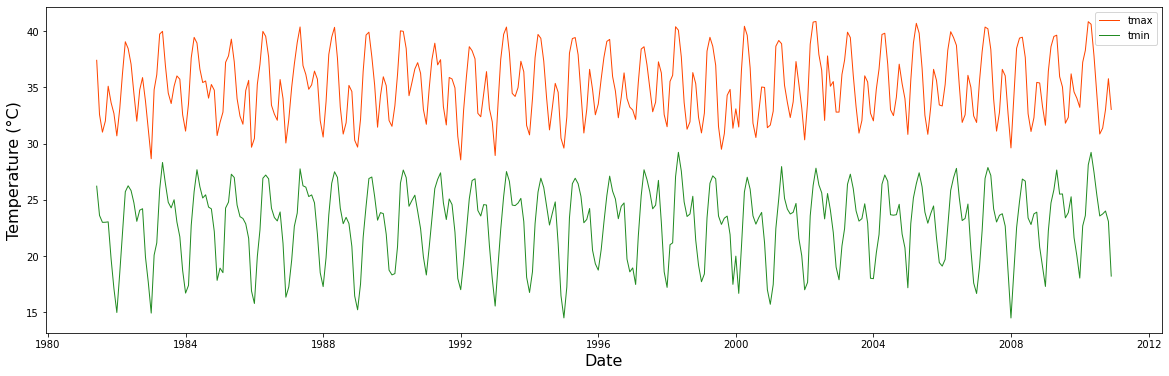

In [37]:
plt.figure(figsize=(20,6))
plt.plot(date_time_m, y_tmax_m, color='orangered', linewidth=1, label='tmax')
plt.plot(date_time_m, y_tmin_m, color='forestgreen', linewidth=1, label='tmin')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=16)
plt.legend()
#plt.savefig('../images/temp_month_1981_2010.png')

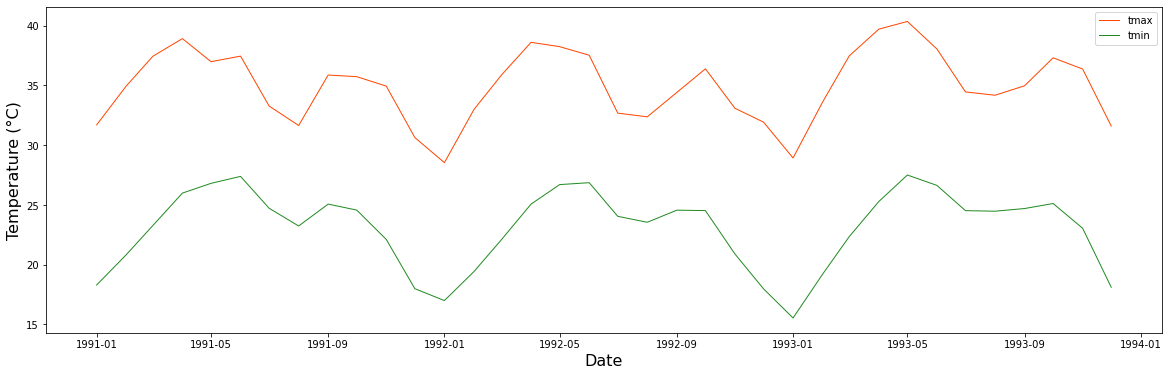

In [38]:
i = 115
j = 151
plt.figure(figsize=(20,6))
plt.plot(date_time_m[i:j], y_tmax_m[i:j], color='orangered', linewidth=1, label='tmax')
plt.plot(date_time_m[i:j], y_tmin_m[i:j], color='forestgreen', linewidth=1, label='tmin')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=16)
plt.legend()
#plt.savefig('../images/temp_month_1991_1993.png')

## Discharge

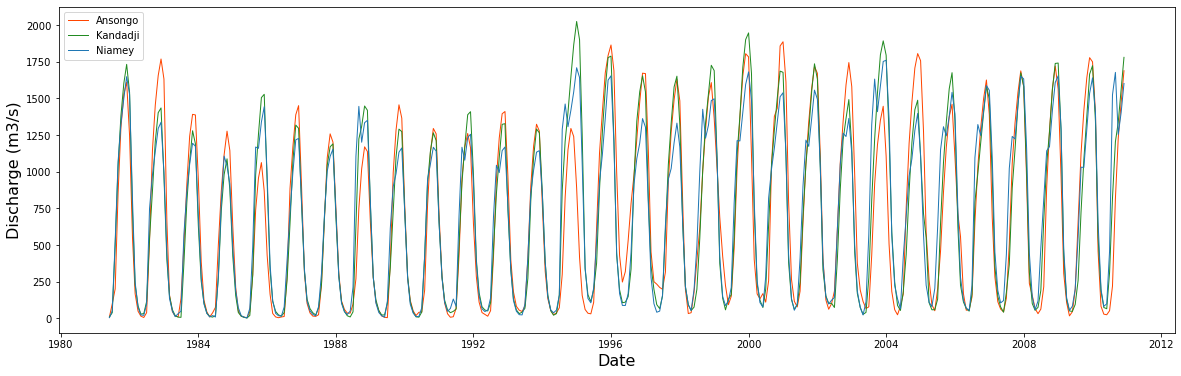

In [39]:
plt.figure(figsize=(20,6))
plt.plot(date_time_m, y_ansongo_m, color='orangered', linewidth=1, label='Ansongo')
plt.plot(date_time_m, y_kandadji_m, color='forestgreen', linewidth=1, label='Kandadji')
plt.plot(date_time_m, y_niamey_m, color='tab:blue', linewidth=1, label='Niamey')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge (m3/s)', fontsize=16)
plt.legend()
#plt.savefig('../images/q_month_1981_2010.png')

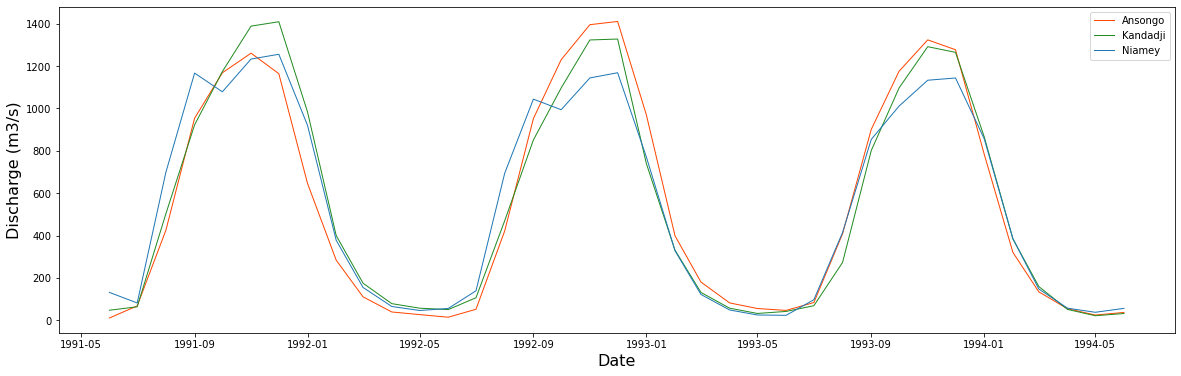

In [40]:
i = 120
j = 157
plt.figure(figsize=(20,6))
plt.plot(date_time_m[i:j], y_ansongo_m[i:j], color='orangered', linewidth=1, label='Ansongo')
plt.plot(date_time_m[i:j], y_kandadji_m[i:j], color='forestgreen', linewidth=1, label='Kandadji')
plt.plot(date_time_m[i:j], y_niamey_m[i:j], color='tab:blue', linewidth=1, label='Niamey')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge (m3/s)', fontsize=16)
plt.legend()
#plt.savefig('../images/q_month_1991_1993.png')